### **The Sparks Foundation**

### **Data Science and Business Analytics Internship**

**Task 1: Prediction using Supervised ML**

**Author: Gauri Thube**

**To predict the percentage of the student based on the number of study hours**



### **Importing libraries and Loading the Dataset**

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the Dataset
data = pd.read_csv('marks_data.csv')
print("Data is imported successfully")

Data is imported successfully


### **Exploratory Data Analysis**

In [3]:
#Analyzing the data
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


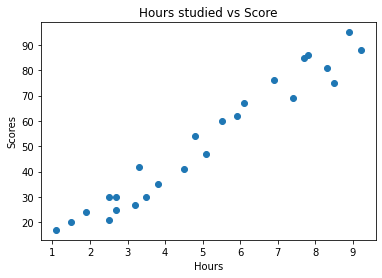

In [7]:
#Plotting Scatter Plot
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours studied vs Score')
plt.scatter(data.Hours,data.Scores)
plt.show()

**From the graph above, we can clearly see that there is positive linear relation between the number of hours studied and percentage of score**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [8]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

### **Splitting the dataset into Training and Test set**

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, test_size=0.2,random_state=0)

### **Training the Algorithm**

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print("Training complete.")

Training complete.


In [11]:
# predicting the test set results
y_pred = regressor.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [12]:
# Comparing Actual vs Predicted
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(5)

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


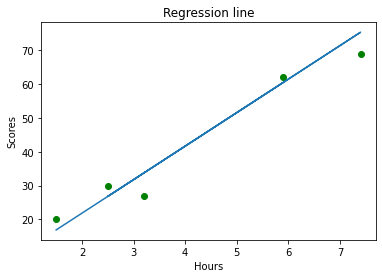

In [13]:
#plotting line on test data
plt.plot(x_test,y_pred)
plt.scatter(x_test,y_test,color='green')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Regression line")
plt.show()

### **Model Evaluation**

In [14]:
# Calculating the Accuracy of model
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9454906892105356

In [15]:
# Predicting the error
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975


### **Predicting the Score**

In [16]:
no_of_hours=9.25
predicted_score = regressor.predict([[no_of_hours]])
print("No of Hours = {}".format(no_of_hours))
print("Predicted Score = {}".format(predicted_score[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


**Therefore, the predicted score using our model if a student studies for 9.25 hrs/day is 93.6917**